<a href="https://colab.research.google.com/github/raima2000/Credit-Risk-Modelling/blob/main/Credit_risk_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EDA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

1) Data exploration

In [ ]:
df=pd.read_csv("/content/credit_risk_dataset.csv")
df.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [ ]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [ ]:
df['loan_status'].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

In [ ]:
df.corr()

<ipython-input-70-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


Very high correlation between person_age & cb_person_cred_hist_length

<Axes: xlabel='loan_status', ylabel='count'>

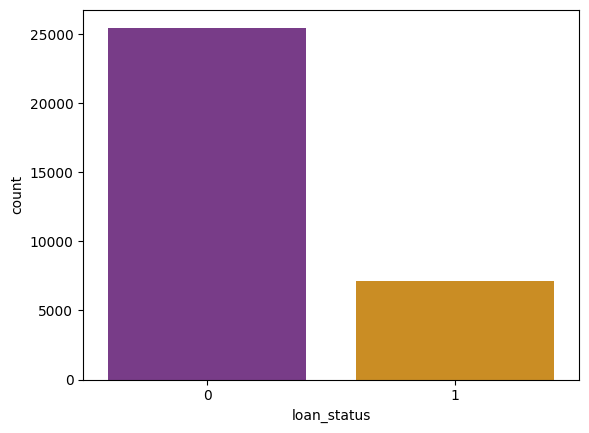

In [ ]:
 sns.countplot(x = "loan_status", data = df,palette='CMRmap')

In [ ]:
df["cb_person_default_on_file"].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<Axes: ylabel='cb_person_default_on_file'>

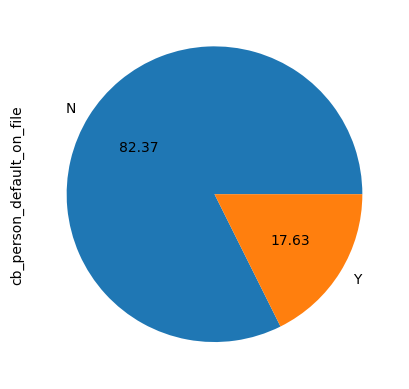

In [ ]:
df["cb_person_default_on_file"].value_counts().plot(kind="pie",autopct="%.2f")

In [ ]:
# Bi - Variate analysis of categorical variable w.r.t loan status



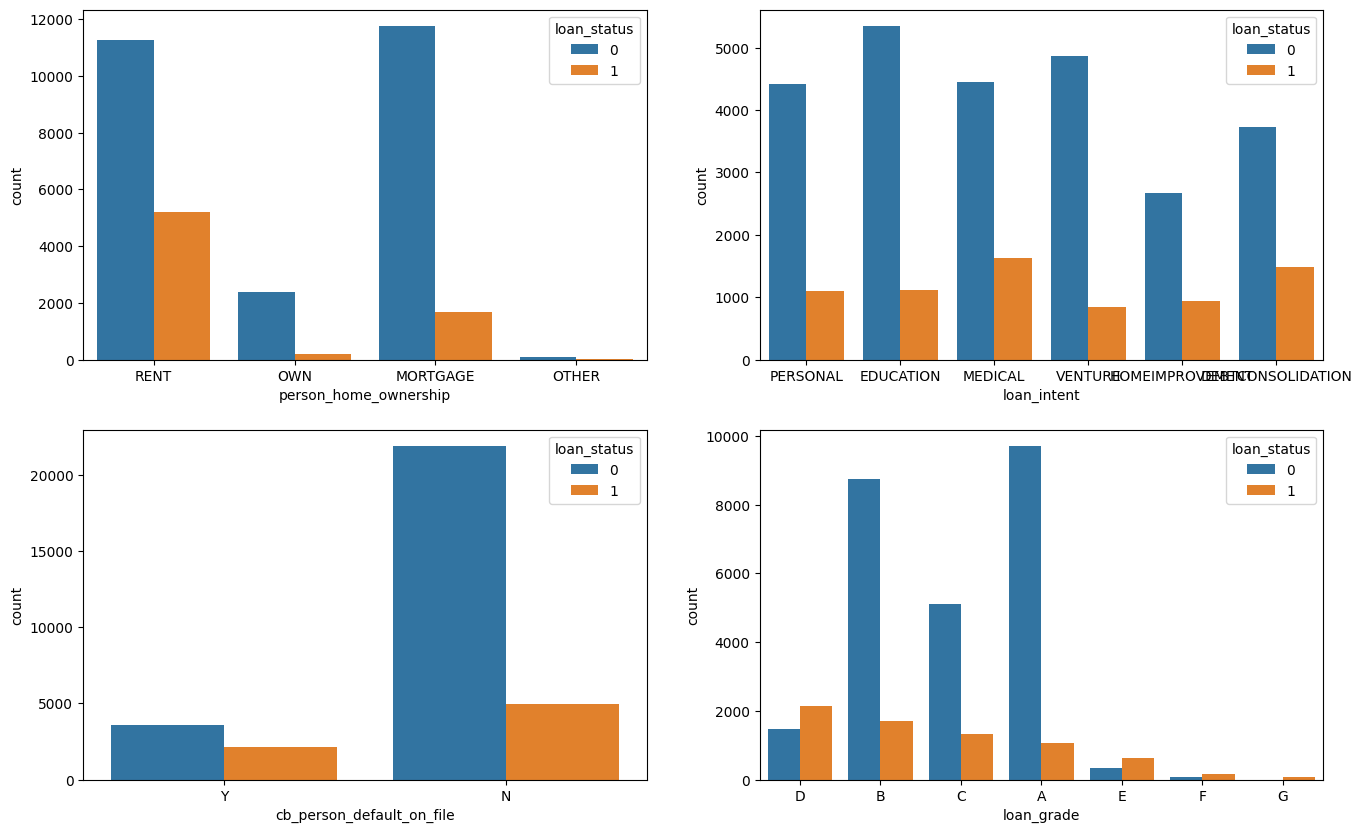

In [ ]:
# Bi - Variate analysis of categorical variable w.r.t loan status


fig, axes = plt.subplots(2, 2, figsize=(16, 10))


data_subset1 = df[['person_home_ownership', 'loan_status']]
data_subset2 = df[['loan_intent', 'loan_status']]
data_subset3 = df[['loan_grade', 'loan_status']]
data_subset4 = df[['cb_person_default_on_file', 'loan_status']]


sns.countplot(x='person_home_ownership', hue='loan_status', data=data_subset1, ax=axes[0, 0])
sns.countplot(x='loan_intent', hue='loan_status', data=data_subset2, ax=axes[0, 1])
sns.countplot(x='loan_grade', hue='loan_status', data=data_subset3, ax=axes[1, 1])
sns.countplot(x='cb_person_default_on_file', hue='loan_status', data=data_subset4, ax=axes[1, 0])

# Display the plot
plt.show()




Text(0, 0.5, 'Loan Percent Income')

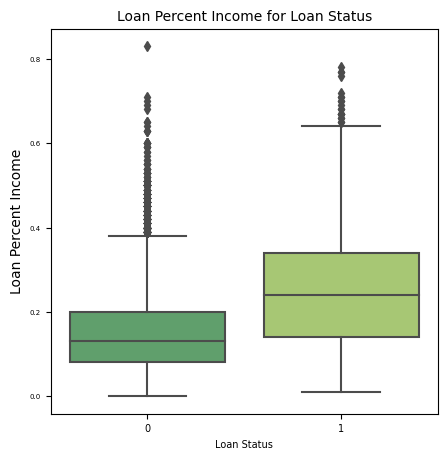

In [ ]:
x = df[["loan_status", "loan_percent_income"]]

f, ax = plt.subplots(figsize=(5,5));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 10)
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 5);
plt.xlabel("Loan Status", fontsize = 7)
plt.ylabel("Loan Percent Income")

<ipython-input-77-ce6a2b865f91>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


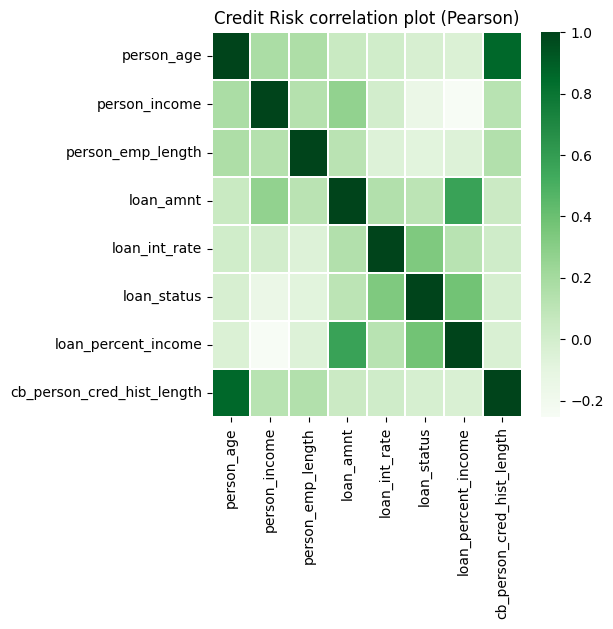

In [ ]:
plt.figure(figsize = (5,5))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

1.b) Dealing Missing Values and Outliers

In [ ]:
df.isnull().sum().sort_values(ascending = False)

loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.duplicated().sum()

165

In [ ]:
(df.isnull().sum()/len(df))*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [ ]:
def dist_plot(data,col):
     plt.figure()
     sns.distplot(data[col].dropna())

<ipython-input-81-869a6bb18447>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())
<ipython-input-81-869a6bb18447>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col].dropna())


(None, None)

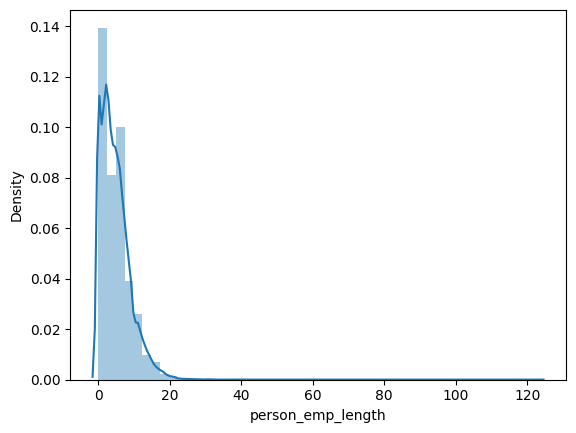

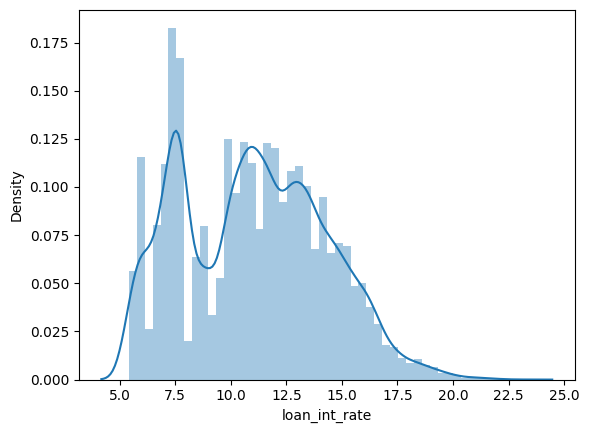

In [ ]:
dist_plot(df,'person_emp_length'), dist_plot(df,'loan_int_rate')

Since both the features do not follow normal distribution we use median to fill the nan values


In [ ]:
median_value = df['person_emp_length'].median()
df['person_emp_length'].fillna(median_value, inplace=True)

In [ ]:
median_value = df['loan_int_rate'].median()
df['loan_int_rate'].fillna(median_value, inplace=True)

In [ ]:
df.isnull().sum().sort_values(ascending = False)

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df['person_age'].max()

144

In [ ]:
#Excluding the age above 90,since it is not required for the analysis
df=df[df['person_age'] <= 90]

In [ ]:
df['person_age'].max()

84

In [ ]:
df['person_emp_length'].max()

123.0

In [ ]:
df = df.loc[df['person_emp_length'] < df['person_age'] - 10]

2)Feature Selection and Engineering

Here we are finding 2 new features as part of feature engineering
Interest Rate (loan_int_rate): The interest rate on the loan is a crucial factor. Higher interest
rates can lead to higher monthly payments, which may increase the likelihood of default.
Income (person_income): Borrower income is a critical factor in assessing credit risk.
Higher income levels typically indicate greater capacity to repay loans.
Debt-to-Income Ratio (loan_percent_income): This ratio measures the borrower's debt
relative to their income. A high debt-to-income ratio could indicate a higher risk of default, as
borrowers with too much existing debt may struggle to repay new loans.
Home Ownership Status (person_home_ownership): Homeownership status can be a
factor, as homeowners may have more stability and assets to secure a loan.

In [ ]:
le=LabelEncoder()
df['loan_intent']=le.fit_transform(df['loan_intent'])
df['person_home_ownership']=le.fit_transform(df['person_home_ownership'])
df['cb_person_default_on_file']=le.fit_transform(df['cb_person_default_on_file'])
df['loan_grade']=le.fit_transform(df['loan_grade'])
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2


In [ ]:
df['loan_to_income'] = df['loan_amnt'] / df['person_income']
df['loan_to_income']

1        0.104167
2        0.572917
3        0.534351
4        0.643382
5        0.252525
           ...   
32576    0.109434
32577    0.146875
32578    0.460526
32579    0.100000
32580    0.154167
Name: loan_to_income, Length: 32573, dtype: float64

In [ ]:
df['loan_to_emp_length_ratio'] = df['person_emp_length']/ df['loan_amnt']
df['loan_to_emp_length_ratio']

1        0.005000
2        0.000182
3        0.000114
4        0.000229
5        0.000800
           ...   
32576    0.000172
32577    0.000227
32578    0.000086
32579    0.000333
32580    0.000309
Name: loan_to_emp_length_ratio, Length: 32573, dtype: float64

In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_to_income,loan_to_emp_length_ratio
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2,0.104167,0.005000
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3,0.572917,0.000182
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2,0.534351,0.000114
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4,0.643382,0.000229
5,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2,0.252525,0.000800


3)Model Building

I implemented Random Forest Classifier because it gives more accuracy than other machine learning models like svm and ensemble techniques. It incorporates multiple decision stumps which are individually trained hence gives higher accuracy. It is easily understable by layman also it can handle huge datasets

In [ ]:
X=df.drop(columns=['loan_status'],axis=1)
y=df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape )

(22801, 13) (22801,) (9772, 13) (9772,)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
class_report = classification_report(y_test, y_pred)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", class_report)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9311297584936553
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7622
           1       0.96      0.72      0.82      2150

    accuracy                           0.93      9772
   macro avg       0.94      0.85      0.89      9772
weighted avg       0.93      0.93      0.93      9772

Confusion Matrix:
 [[7561   61]
 [ 612 1538]]


4) Hyperparameter Tuning

I have used GridSearchCV because it is a systematic but exhaustive search method that explores all specified combinations of hyperparameters within a defined grid.

In [ ]:
from sklearn.model_selection import GridSearchCV
# Below are the hyperparameters to be tuned
param_grid = {
'n_estimators': [50, 100, 200],
'max_depth': [None, 5, 10],
'min_samples_split': [2, 5, 10]
}
# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)
# Initialize Grid Search with cross-validation (using cv=5 )
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid,cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy with Tuned Model: {accuracy}")

Best Hyperparameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy with Tuned Model: 0.930720425706099


5) Model Interpretation

In [ ]:
rf_classifier.fit(X_train, y_train)


feature_importances = rf_classifier.feature_importances_


feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


print("Feature Importance:")
print(feature_importance_df)












Feature Importance:
                       Feature  Importance
11              loan_to_income    0.154774
8          loan_percent_income    0.134860
1                person_income    0.117659
7                loan_int_rate    0.103679
5                   loan_grade    0.103053
2        person_home_ownership    0.096327
4                  loan_intent    0.060810
6                    loan_amnt    0.055153
12    loan_to_emp_length_ratio    0.054150
3            person_emp_length    0.042180
0                   person_age    0.036627
10  cb_person_cred_hist_length    0.030508
9    cb_person_default_on_file    0.010220


Employment Length (person_emp_length): Longer employment history indicates stability, potentially reducing the likelihood of default.

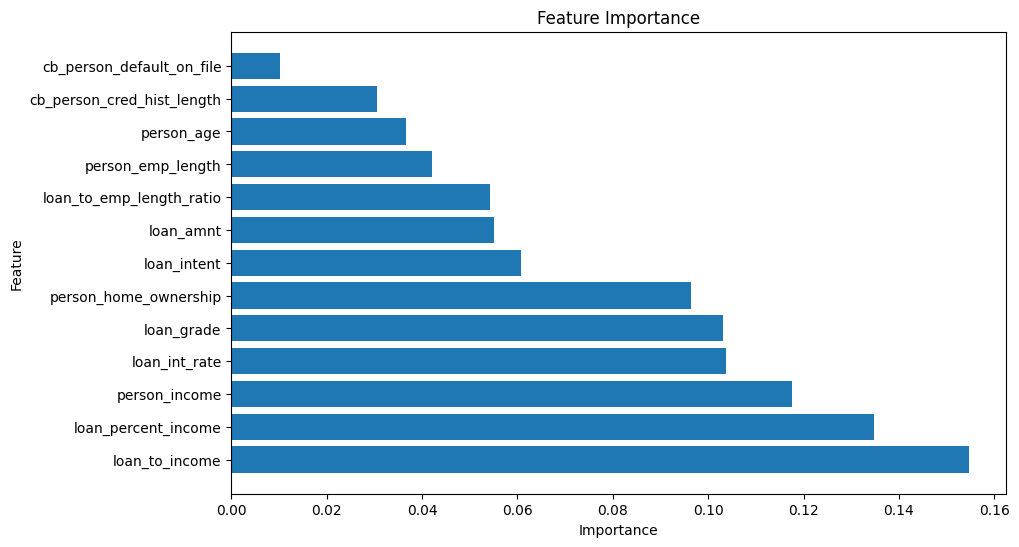

In [ ]:

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()

Feature Importance: It gives feature importance scores for the
model. Feature importance tells us which input features (variables) had the most impact on the model. This is used because random forest classifier has low interpretability skills compared to other models.

CHALLENGES

Complexity: Random Forests can capture complex interactions between features, making it
challenging to provide a simple, intuitive explanation for each prediction.

RECOMENDATIONS

Create awareness to the borrower about the consequences of defaulted payments.

Can use the model to forecast and manage loans with high interest. Also understand customer history and behaviour to provide more efficient and personalized loans.
